# Curso de Optimización I (DEMAT/CIMAT)
# Tarea 2

| Descripción:                         | Fechas                  |
|--------------------------------------|-------------------------|
| Fecha de publicación del documento:  | **Febrero  4, 2024**    |
| Fecha límite de entrega de la tarea: | **Febrero 11, 2024**    |

## Indicaciones

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales.
- Si todos los códigos para que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimir el notebook
  y puede anexar este archivo en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No incluya el PDF dentro del ZIP**, porque la idea que lo pueda accesar
  directamente para poner anotaciones y la calificación de cada ejercicio.

En la descripción de los ejercicios se nombran algunas variables
para el algoritmo, pero sólo es para facilitar la descripción.
En la implementación pueden nombrar sus variables como gusten.

En los algoritmos se describen las entradas de las
funciones. La intención es que tomen en cuenta lo que requiere
el algoritmo y que tiene que haber parámetros que permitan
controlar el comportamiento del algoritmo,
evitando que dejen fijo un valor y que no se puede modificar
para hacer diferentes pruebas. Si quieren dar esta información
usando un tipo de dato que contenga todos los valores o
usar variables por separado, etc., lo pueden hacer y no usen
variables globales si no es necesario.

Lo mismo para los valores que devuelve una función.
Pueden codificar como gusten la manera en que regresa los cálculos.
El punto es que podamos tener acceso a los resultados para poder usarlos,
y por eso no es conveniente que la función sólo imprima los valores
sin devolverlos.

Para los ejercicios teóricos puede escribir en la celda la solución, o
si escribio la solución en una hoja, puede insertar una(s) foto(s) en la que
se vea clara la solución. Si le es más facíl insertar la imagen en un procesador
de texto como Word, lo puede utilizar y exportar el documento a PDF y subir
el archivo. No lo compacte para que se pueda escribir anotaciones en el PDF.

---

## Ejercicio 1 (2 puntos)

Estimar la cantidad de iteraciones que requiere el algoritmo de descenso máximo
con paso exacto para alcanzar el minimizador  $\mathbf{x}_*$ de la función
cuadrática

$$ f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}  $$

donde $\mathbf{A}$ es una matriz simétrica y definida positiva que
su información y la del arreglo $\mathbf{b}$ está almacenada en archivo en formato `npz`
contenido en el archivo `datosTarea02.zip`.

Para hacer esto, calculamos el minimizador $\mathbf{x}_{*}$ de $f(\mathbf{x})$ resolviendo
el sistema de ecuaciones $\mathbf{A}\mathbf{x}_{*} = \mathbf{b}$ y definimos

$$ q(\mathbf{x}) = \frac{1}{2} (\mathbf{x}-\mathbf{x}_{*})^\top\mathbf{A}(\mathbf{x}-\mathbf{x}_{*}). $$

Sabemos que $q(\mathbf{x})$ y $f(\mathbf{x})$ sólo difieren en una constante y podemos
usar $q(\mathbf{x})$ para estimar la manera en que decrece la función mediante el resultado
de la Proposición 6 de la Clase 6:
   
$$ q(\mathbf{x}_{k+1}) \leq \left(\frac{\lambda_{\max}(\mathbf{A})-\lambda_{\min}(\mathbf{A})}{
    \lambda_{\max}(\mathbf{A})+\lambda_{\min}(\mathbf{A})} \right)^2 q(\mathbf{x}_k). $$

Si
   
$$ c = \frac{\lambda_{\max}(\mathbf{A})-\lambda_{\min}(\mathbf{A})}{
    \lambda_{\max}(\mathbf{A})+\lambda_{\min}(\mathbf{A})} , $$
    
entonces

$$ q(\mathbf{x}_{k+1}) \leq c^2 q(\mathbf{x}_k) \leq c^4 q(\mathbf{x}_{k-1})
\leq c^6 q(\mathbf{x}_{k-2}) \leq ... \leq c^{2k} q(\mathbf{x}_{1}) \leq c^{2(k+1)} q(\mathbf{x}_{0}). $$

Como  
$$2q(\mathbf{x}_k) =  (\mathbf{x}-\mathbf{x}_{*})^\top\mathbf{A}(\mathbf{x}-\mathbf{x}_{*})
=  \|\mathbf{x}-\mathbf{x}_{*}\|^2_{\mathbf{A}},  $$

$q(\mathbf{x}_k)$ es una medida de la distancia al cuadrado de $\mathbf{x}_k$ a $\mathbf{x}_{*}$,
de modo dada una tolerancia $\tau>0$ podemos buscar el valor $k$ para el cual se cumpla

$$ \|\mathbf{x}_k-\mathbf{x}_{*}\|_{\mathbf{A}} = \sqrt{2q(\mathbf{x}_k)}
\leq c^k \sqrt{2q(\mathbf{x}_0)} < \tau $$

y ese $k$ es la estimación de la cantidad de iteraciones que requiere el algoritmo.

1. Escriba una función que reciba como parámetro el nombre de un archivo  `npz`,
   lea el archivo y cree la matriz $\mathbf{A}$ y el vector $\mathbf{b}$  del archivo `npz`,
   y calcule el minimizador $\mathbf{x}_{*}$ de $f(\mathbf{x})$ resolviendo
   el sistema de ecuaciones $\mathbf{A}\mathbf{x}_{*} = \mathbf{b}$. Use la factorización
   de Cholesky para resolver el sistema de ecuaciones y de esta manera
   saber si la matriz es definida positiva, y en este caso devolver
   $\mathbf{A}$, $\mathbf{b}$ y $\mathbf{x}_{*}$. En caso contrario devolver
   $\mathbf{A}$, $\mathbf{b}$ y $None$.
2. Programe la función  que evalua la función
   $q(\mathbf{x}) = \frac{1}{2} (\mathbf{x}-\mathbf{x}_{*})^\top\mathbf{A}(\mathbf{x}-\mathbf{x}_{*})$.
   La función recibe como parámetros el punto $\mathbf{x}$, la matriz $\mathbf{A}$ y el punto $\mathbf{x}_{*}$
   y devolver el valor de $q(\mathbf{x})$.
3. Programe una función estima la cantidad de iteraciones que el algoritmo requiere.
   Esta función recibe como argumentos la matriz $\mathbf{A}$, el punto $\mathbf{x}_0$,
   el punto $\mathbf{x}_*$ y una tolerancia $\tau>0$.
   La función calcula la cantidad $c$ descrita anteriormente y determina el entero $k$ que cumple
   con $c^k \sqrt{2q(\mathbf{x}_0)} < \tau$.
   La función debe devolver $k$ y $c$.
4. Pruebe la función del punto anterior usando los datos de cada archivo `npz` contenidos
   en el archivo `datosTarea02.zip`.
   Use la función del Punto 1 y si se pudo calcular $\mathbf{x}_{*}$,
   defina $n$ como el tamaño del vector $\mathbf{b}$, el  punto inicial
   $\mathbf{x}_{0} = (10, 10, ..., 10)^\top$ de dimensión $n$ y  
   ejecute la función del Punto 3 usando como tolerancia $\tau = \sqrt{\epsilon_m}$,
   donde $\epsilon_m$  es el épsilon de la máquina.
   
   Imprima el valor $n$, $q(\mathbf{x}_0)$, $k$, $c$.
   
**Nota:** Cada archivo `npz` en el ZIP tiene dos arreglos que corresponden a la matriz
$\mathbf{A}$ y el vector $\mathbf{b}$. Para leer los datos puede hacer, por ejemplo:

```
npzfile = np.load("datosTarea02/matA_vecb1.npz")
A  = npzfile['arr_0']
b  = npzfile['arr_1']
```

### Solución:

In [ ]:
#importamos librerías
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#creamos la función para lectura de datos
def read_npz():
  name=input("Ingrese el nombre del archivo: ")
  data=np.load(name)
  return data['arr_0'], data['arr_1']

In [ ]:
#creamos una función para resolver por descomposición de cholesky
def solve_cholesky(A, b):
  At=np.transpose(A)
  #verificamos que la matriz sea simétrica y def positiva
  if np.allclose(A, At) and np.all(np.linalg.eigvals(A)>0):
    #factorizamos y resolvemos
    L=np.linalg.cholesky(A)
    c=np.linalg.solve(L, b)
    x=np.linalg.solve(np.transpose(L), c)
    return x
  else:
    print("La matriz no es definida positiva.")
    return None

In [ ]:
#programamos la función q
def q(x,A,xs):
  y=x-xs
  return 0.5*y.T@A@y

In [ ]:
#función para calcular el número de iteraciones

def approx_iter(A, x, y, tol):
  #calculamos c
  eigen_values=np.linalg.eigvals(A)
  lmax=max(eigen_values)
  lmin=min(eigen_values)
  c=(lmax-lmin)/(lmax+lmin)
  i=1
  z=np.sqrt(2*q(x,A,y))
  k=np.floor((np.log(tol)-np.log(z))/np.log(c))
  #usamos floor pues se necesita que k<(log(tol)-log(z))/log(c)
  #entonces redondeamos al entero mas cercano por debajo
  return c, k

In [ ]:
#calculamos el epsilon de la máquina
eps_machine=1
while 1+eps_machine != 1:
  eps_machine/=2
print(eps_machine)

1.1102230246251565e-16


In [ ]:
#definimos una función para calcular todo lo pedido
def solver(A, b):
  x_s=solve_cholesky(A, b)
  tol=np.sqrt(eps_machine)
  n=b.shape
  x_0=np.ones(n)*10

  #calculamos el número de iteraciones
  c, iter=approx_iter(A, x_0, x_s, tol)
  print("c =", c)
  print("q(x0) =", q(x_0, A, x_s))
  print("n =",n)
  print("k =", iter)

In [ ]:
#probaremos ahora con los primeros datos
A1, b1=read_npz()

solver(A1, b1)

Ingrese el nombre del archivo: matA_vecb1.npz
c = 0.6666666666666666
q(x0) = 1113.15
n = (2,)
k = 54.0


In [ ]:
#ahora con los datos 2
A2, b2=read_npz()

solver(A2, b2)

Ingrese el nombre del archivo: matA_vecb2.npz
c = 0.8610359125293416
q(x0) = 2658.8249999999994
n = (10,)
k = 151.0


In [ ]:
#ahora con los datos 3
A3, b3=read_npz()

solver(A3, b3)

Ingrese el nombre del archivo: matA_vecb3.npz
c = 0.04175532669469203
q(x0) = 18134.27
n = (100,)
k = 7.0


In [ ]:
#finalmente con los datos 4
A4, b4=read_npz()

solver(A4, b4)

Ingrese el nombre del archivo: matA_vecb4.npz
c = 0.9132114471426366
q(x0) = 543978.79
n = (500,)
k = 278.0


_

```







```

---

## Ejercicio 2 (3 puntos)

Programe el Algoritmo 2 de la Clase 5 para optimizar funciones cuadráticas de la forma
$$ f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}  $$
con el método de descenso máximo con paso exacto.

1. La función que implementa el algoritmo recibe como argumentos:
- la matriz $\mathbf{A}$ (que se supone que es simétrica y definida positiva),
- el vector $\mathbf{b}$ de la función cuadrática,
- un punto inicial $\mathbf{x}_{0}$
- una tolerancia $\tau$ y
- el número máximo de iteraciones $N$.

La función debe devolver:
- El último punto $\mathbf{x}_{k}$ generado por el algoritmo,
- el número $k$ de iteraciones realizadas y
- Una variable indicadora que es $True$ si el algoritmo termina por
  cumplirse la condición de paro ($\|\alpha_k \mathbf{g}_{k}\| < \tau$) o
  $False$ si termina porque se alcanzó el número máximo de iteraciones.

2. Programe la función que evalúa la función $f(\mathbf{x})$.
   La función recibe como argumentos la matriz $\mathbf{A}$ y el vector $\mathbf{b}$,
   y devuelve el valor $\frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}$.
   
3. Pruebe el algoritmo con las matrices y vectores que se encuentran en los archivos
   `npz` que están contenidos en el archivo `datosTarea02.zip`:

Para cada archivo npy haga lo siguiente:
- Use la función del Punto 1 del Ejercicio 1 para obtener $\mathbf{A}$, $\mathbf{b}$
  y $\mathbf{x}_*$. Si $\mathbf{x}_*$ no es `None` continúe y
  defina la variable $n$ como el tamaño del vector $\mathbf{b}$. Imprima el valor de $n$
  para saber la dimensión de la variable $\mathbf{x}$.
- Haga $\mathbf{x}_{0} = (10, 10, ..., 10)^\top$ de dimensión $n$.
- Defina la tolerancia $\tau = \sqrt{\epsilon_m}$, donde $\epsilon_m$
  es el épsilon de la máquina.
- Calcule el punto $\mathbf{x}_{k}$ con el algoritmo. Elija el número de iteraciones máximas
  para el algoritmo. Puede tomar como referencia el resultado en el Ejercicio 1.
- Imprima los valores

$$ f(\mathbf{x}_0), k, f(\mathbf{x}_k), \|\mathbf{x}_{k}-\mathbf{x}_{*}\|, $$

y $\mathbf{x}_{k}$ si $n\leq 6$, o los primeros tres elementos y los últimos tres elementos del arreglo $\mathbf{x}_{k}$ si $n>6$.

4. Escriba un comentario sobre si el número de iteraciones estimadas fue una buena cota superior.

### Solución:

In [ ]:
#definimos la funcion de descenso
def Max_Dec_QF(A, b, x0, tol, maxIter):
  for i in range(maxIter):
    g=A@x0-b
    alpha=(np.linalg.norm(g)**2)/(g.T@A@g)
    if (np.linalg.norm(alpha*g))<tol:
      return x0, i, True
    x0=x0-alpha*g
  return x0, maxIter, False

In [ ]:
#definimos la función f

def f(x,A,b):
  return x.T@A@x/2 -b.T@x

In [ ]:
#todas las matrices ya están cargadas (A1, b1), (A2, b3), etc
#así que solo haremos uso de ellas

x_s1=solve_cholesky(A1, b1)
np.all(x_s1)!=None

True

In [ ]:
#ya que x_s1 no es None, continuamos
n1=b1.shape[0]
print("n =", n1)
tol=np.sqrt(eps_machine)

x_0=np.ones(n1)*10
x_k1, k1, iter = Max_Dec_QF(A1, b1, x_0, tol, 56)

n = 2


In [ ]:
print("f(x_0) =",f(x_0, A1, b1))
print("k =", k1)
print("f(x_k) =",f(x_k1, A1, b1))
print("||x_k-k_s|| =",np.linalg.norm(x_k1-x_s1))
print("x_k =",x_k1)

f(x_0) = 1110.0
k = 5
f(x_k) = -3.1500000000000004
||x_k-k_s|| = 1.4608708106561238e-09
x_k = [-0.3 -0.8]


In [ ]:
#veamos ahora con la siguiente matriz
x_s2=solve_cholesky(A2, b2)
np.all(x_s2)!=None

True

In [ ]:
#ya que x_s2 no es None, continuamos
n2=b2.shape[0]

print("n =", n2)
x_0=np.ones(n2)*10
x_k2, k2, iter = Max_Dec_QF(A2, b2, x_0, tol, 154)

n = 10


In [ ]:
print("f(x_0) =",f(x_0, A2, b2))
print("k =", k2)
print("f(x_k) =",f(x_k2, A2, b2))
print("||x_k-k_s|| =",np.linalg.norm(x_k2-x_s2))
print("x_k = {},...,{}".format(x_k2[:3], x_k2[-3:]))

f(x_0) = 2626.0
k = 107
f(x_k) = -32.824999999999996
||x_k-k_s|| = 4.6597257953357906e-08
x_k = [0.99999999 1.         1.00000002],...,[0.99999998 1.00000001 1.        ]


In [ ]:
#ahora con la matriz y vector 3
x_s3=solve_cholesky(A3, b3)
np.all(x_s3)!=None

True

In [ ]:
#ya que x_s3 no es None, continuamos
n3=b3.shape[0]

print("n =", n3)
x_0=np.ones(n3)*10
x_k3, k3, iter = Max_Dec_QF(A3, b3, x_0, tol, 8)

n = 100


In [ ]:
print("f(x_0) =",f(x_0, A3, b3))
print("k =", k3)
print("f(x_k) =",f(x_k3, A3, b3))
print("||x_k-k_s|| =",np.linalg.norm(x_k3-x_s3))
print("x_k = {},...,{}".format(x_k3[:3], x_k3[-3:]))

f(x_0) = 17984.4
k = 7
f(x_k) = -149.86999999999992
||x_k-k_s|| = 1.2326878723472909e-09
x_k = [-1. -1. -1.],...,[-1. -1. -1.]


In [ ]:
#ahora con los últimos datos
x_s4=solve_cholesky(A4, b4)
np.all(x_s4)!=None

True

In [ ]:
#ya que x_s4 no es None, continuamos
n4=b4.shape[0]

print("n =", n4)
x_0=np.ones(n4)*10
x_k4, k4, iter = Max_Dec_QF(A4, b4, x_0, tol, 283)

n = 500


In [ ]:
print("f(x_0) =",f(x_0, A4, b4))
print("k =", k4)
print("f(x_k) =",f(x_k4, A4, b4))
print("||x_k-k_s|| =",np.linalg.norm(x_k4-x_s4))
print("x_k = {},...,{}".format(x_k4[:3], x_k4[-3:]))

f(x_0) = 543542.6
k = 121
f(x_k) = -436.18999999999977
||x_k-k_s|| = 6.122903367403867e-08
x_k = [ 1. -1.  1.],...,[-1.          0.99999999 -1.        ]


Después de observar los resultados, notamos que las cotas superiores para el máximo de iteraciones es muy buena en todos los casos, ya que, según la tolerancia, solo hubo un caso en el que fue demasiado precisa, mientras que en las otras el algoritmo llegaba antes a la solución que al límite de iteraciones.

_

```







```

---

## Ejercicio 3 (3.5 puntos)

Programe el Algoritmo 1 de la Clase 5  de descenso máximo, usando el método de la
sección dorada para obtener $\alpha_k \in [0,1]$:

$$ \alpha_k  = \arg \; \min_{\alpha\in[0,1]} \; f(\mathbf{x}_{k} - \alpha \nabla f(\mathbf{x}_{k})).$$

1. La función que implementa el algoritmo recibe como entrada:
- La función $f(\mathbf{x})$,
- el gradiente $\nabla f(\mathbf{x})$ de la función $f$,
- un punto inicial $\mathbf{x}_{0}$,
- las tolerancia $\tau_1>0$ y $\tau_2>0$,
- el número máximo de iteraciones $N$ para el algoritmo de descenso máximo, y
- el número máximo de iteraciones $N_{gs}$ para el método de la sección dorada.

La función devuelve
- El último punto $\mathbf{x}_{k}$ generado por el algoritmo,
- el número $k$ de iteraciones realizadas y
- Una variable indicadora que es $True$ si el algoritmo termina por
  cumplirse la condición de paro ($\|\alpha_k \mathbf{p}_{k}\| < \tau_1$) o
  $False$ si termina porque se alcanzó el número máximo de iteraciones.
- Un arreglo que contiene la secuencia de puntos $\mathbf{x}_{0}, \mathbf{x}_{1}, ...
  \mathbf{x}_{k}$ si la dimensión de la variable es $n=2$, y es vacío en otro
  caso. Es decir, sólo cuando la dimensión guardamos la secuencia de puntos.
  
Dentro de esta función se puede definir $\phi(\alpha)=f(\mathbf{x}_{k} - \alpha \nabla f(\mathbf{x}_{k}))$
y usar el algoritmo de la sección dorada de la Tarea 1 para calcular su minimizador $\alpha_k$
en el intervalo $[0, 1]$. Para hacer esto, puede usar una función `lambda` como en el ejemplo
en las notas de la **Ayudantía 2**. Use la tolerancia $\tau_2$ para el algoritmo de la
sección dorada.


2. Para probar el algoritmo, programe las siguientes funciones, calcule su gradiente
   de manera analítica y programe la función correspondiente. Use cada punto
   $\mathbf{x}_0$ como punto inicial del algoritmo.  

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
$$ \mathbf{x}_0 = (2.,4.) $$
$$ \mathbf{x}_0 = (0.,0.) $$


**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
$$ \mathbf{x}_0 = (2.,3.) $$
$$ \mathbf{x}_0 = (2.,4.) $$
   

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
$$ \mathbf{x}_0 = (-2.1, 4.5) $$
$$ \mathbf{x}_0 = (-1.2, 1.0) $$
$$ \mathbf{x}_0 = (-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5) $$
$$ \mathbf{x}_0 = (-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0) $$

En la página [Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization)
pueden ver las gráficas de estas funciones y sus mínimos locales.

Use las  tolerancias $\tau_1 = \sqrt{n}\epsilon_m^{1/3}, \tau_2 = \epsilon_m^{1/2}$,
donde $\epsilon_m$ es el épsilon de la máquina, use el número de iteraciones máximas
$N=10000$ para el descenso máximo y $N_{gs}=200$ para el método de la sección dorada.

Para las funciones de dos variables grafique los contornos de nivel. Modifique la
función `contornosFnc2D`, o haga la suya, y pase como argumento la secuencia de
puntos que devuelve el algoritmo para visualizar la trayectoria de los puntos $\mathbf{x}_k$.

3. Repita la prueba para función de Rosenbrock usando el punto inicial $\mathbf{x}_0 = (-2.1, 4.5)$
   usando $\tau_2 = \epsilon_m^{1/4}$ y $N_{gs}=50$ para relajar las condiciones de
   paro del método de la sección dorada y ver si podemos terminar más rápido.
   Escriba un comentario sobre si conviene hacer esto o cuando no conviene hacerlo.

### Solución:

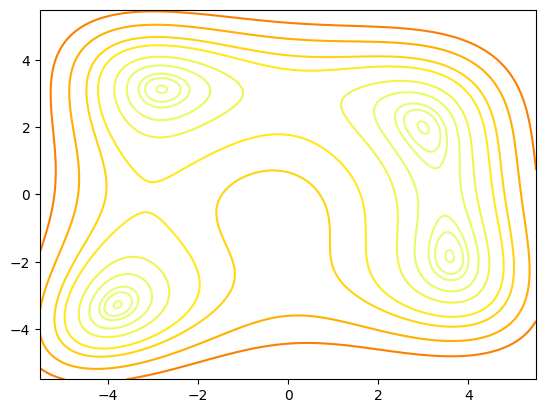

In [ ]:
def fncHimmelblau(x, fparam=None):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2;


def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels):
    # Crea una discretización uniforme del intervalo [xleft, xright]
    ax = np.linspace(xleft, xright, 250)
    # Crea una discretización uniforme del intervalo [ybottom, ytop]
    ay = np.linspace(ybottom, ytop, 200)
    # La matriz mX que tiene las abscisas
    mX, mY = np.meshgrid(ax, ay)
    # Se crea el arreglo mZ con los valores de la función en cada nodo
    mZ = mX.copy()
    for i,y in enumerate(ay):
        for j,x in enumerate(ax):
            mZ[i,j] = fncf(np.array([x,y]))
    # Grafica de las curvas de nivel
    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='Wistia')

contornosFnc2D(fncHimmelblau, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

In [ ]:
def contornosFnc2D_modified(fncf, xleft, xright, ybottom, ytop, levels, puntos):
    # Crear una discretización uniforme del intervalo [xleft, xright]
    ax = np.linspace(xleft, xright, 250)
    # Crear una discretización uniforme del intervalo [ybottom, ytop]
    ay = np.linspace(ybottom, ytop, 200)
    # La matriz mX que tiene las abscisas
    mX, mY = np.meshgrid(ax, ay)
    # Se crea el arreglo mZ con los valores de la función en cada nodo
    mZ = mX.copy()
    for i, y in enumerate(ay):
        for j, x in enumerate(ax):
            mZ[i, j] = fncf(np.array([x, y]))

    # Grafica de las curvas de nivel
    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='Wistia')

    puntos = np.array(puntos)
    ax.scatter(puntos[:, 0], puntos[:, 1], color='red', label='Puntos')

    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Curvas de Nivel y Puntos')
    plt.legend()
    plt.show()

In [ ]:
#primero traemos la función de la sección dorada

def golden_section(x_l, x_u, tol_1, tol_2, maxIter, f):
  #definimos el número áureo
  rho=(np.sqrt(5)-1)/2
  #comenzamos con las iteraciones
  for i in range(maxIter):
    b=rho*(x_u-x_l)
    x_1=x_u-b
    x_3=x_l+b
    #actualizamos los valores de x_u y x_l
    if f(x_1)<f(x_3):
      x_u=x_3
      x_k=x_1
    else:
      x_l=x_1
      x_k=x_3
    #verificamos tolerancias
    if x_u-x_l<tol_1 or np.abs(f(x_1)-f(x_3))<tol_2:
      return np.array([x_k, x_l, x_u, i+1, f(x_k), True])
  return np.array([x_k, x_l, x_u, maxIter, f(x_k), False])

In [ ]:
#definimos la función de máximo descenso

def Max_Dec(f, df, x0, tol1, tol2, mIter1, mIter2):
  x=x0
  n=x0.shape[0]
  seq_points=[x0.copy()]
  def f1(a):
      return f(x-a*df(x))
  for i in range(mIter1):
    gk=df(x)
    pk=-gk
    y=golden_section(0, 1, tol2, tol2, mIter2, f1)
    if y[-1]==False:
      print("Seccion dorada alcanzó el max de iteraciones")
    alpha=y[0]
    #revisamos con la tolerancia
    if np.linalg.norm(alpha*pk)<tol1:
      return x, i, True, seq_points
    x=x+alpha*pk
    seq_points.append(x.copy())
  return x, mIter1, False, seq_points

In [ ]:
#definimos las funciones

def himmelblau(x):
  return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2

def Grad_himmelblau(x):
  d1=4*x[0]**3 + 4*x[0]*x[1] - 42*x[0] + 2*x[1]**2 - 14
  d2=4*x[1]**3 + 4*x[0]*x[1] + 2*x[0]**2 - 26*x[1] - 22
  return np.array([d1,d2])

def beale(x):
  return (1.5-x[0]+x[1]*x[0])**2 + (2.25-x[0]+x[0]*x[1]**2)**2 + (2.625-x[0]+x[0]*x[1]**3)**2

def Grad_beale(x):
  d1=2*(x[1]-1)*(1.5-x[0]+x[1]*x[0])+2*(x[1]**2-1)*(2.25-x[0]+x[0]*x[1]**2)+2*(x[1]**3-1)*(2.625-x[0]+x[0]*x[1]**3)
  d2=2*(x[0])*(1.5-x[0]+x[1]*x[0])+4*(x[0]*x[1])*(2.25-x[0]+x[0]*x[1]**2)+6*(x[0]*x[1]**2)*(2.625-x[0]+x[0]*x[1]**3)
  return np.array([d1, d2])

def rosenbrock(x):
  f=0
  n=x.shape[0]
  for i in range(n-1):
    f+=100*(x[i+1]-x[i]**2)**2 + (1-x[i])**2
  return f

def Grad_rosenbrock(x):
  n=x.shape[0]
  grad=np.zeros(n)
  grad[0]=-2*(1-x[0])-400*x[0]*(x[1]-x[0]**2)
  grad[-1]=200*(x[-1]-x[-2]**2)
  for i in range(1,n-1):
    grad[i]=200*(x[i]-x[i-1]**2-2*x[i]*x[i+1]+2*x[i]**3) -2*(1-x[i])
  return grad

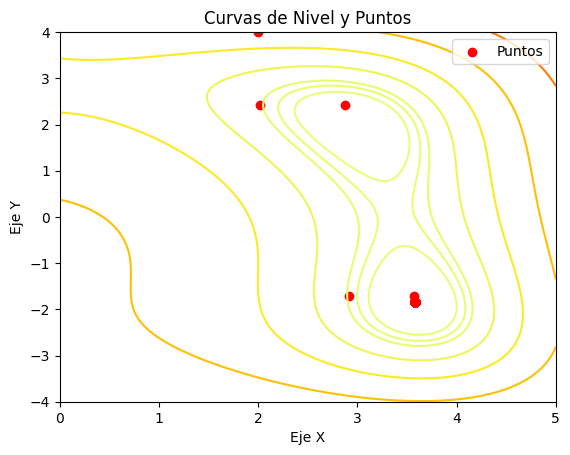

In [ ]:
#probamos para la función de himmelblau
x_01=np.array([2,4])
n=x_01.shape[0]
tol1=np.sqrt(n)*eps_machine**(1/3)
tol2=np.sqrt(eps_machine)
mIter1=10000
mIter2=200
sol1=Max_Dec(himmelblau, Grad_himmelblau, x_01, tol1, tol2, mIter1, mIter2)
points=sol1[3]
contornosFnc2D_modified(himmelblau, 0, 5, -4, 4, [10, 15, 20, 40, 80, 160, 320], points)

In [ ]:
print("El minimizador alcanzado es:", sol1[0])
print("¿Terminó por criterio de paro?", sol1[-2])
print("Iteraciones alcanzadas:", sol1[1])

El minimizador alcanzado es: [ 3.58443171 -1.84812622]
¿Terminó por criterio de paro? False
Iteraciones alcanzadas: 10000


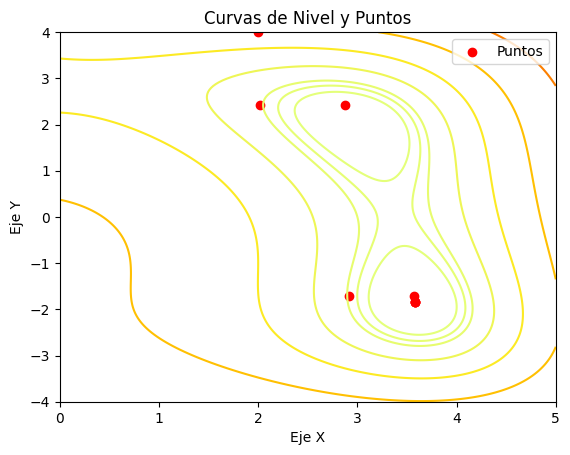

In [ ]:
#notamos que se alcanza el límite de iteraciones lo que significa que no alcanza
#la tolerancia, veamos qué ocurre si la disminuimos
sol1=Max_Dec(himmelblau, Grad_himmelblau, x_01, tol1*10, tol2, mIter1, mIter2)
points=sol1[3]
contornosFnc2D_modified(himmelblau, 0, 5, -4, 4, [10, 15, 20, 40, 80, 160, 320], points)

In [ ]:
print("El minimizador alcanzado es:", sol1[0])
print("¿Terminó por criterio de paro?", sol1[-2])
print("Iteraciones alcanzadas:", sol1[1])

El minimizador alcanzado es: [ 3.5844319  -1.84811007]
¿Terminó por criterio de paro? True
Iteraciones alcanzadas: 8


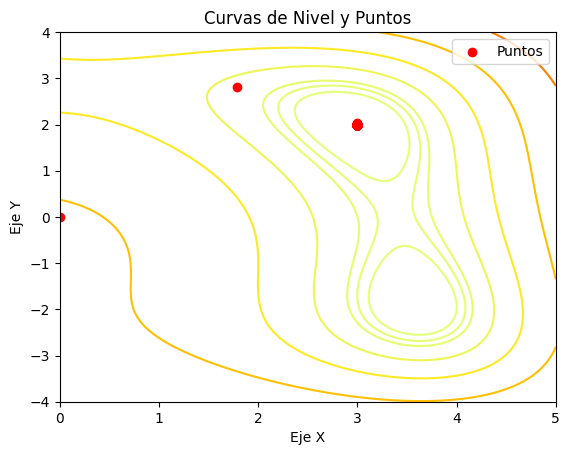

In [ ]:
#para la misma función en el otro punto
x_02=np.array([0,0])
n=x_02.shape[0]
sol2=Max_Dec(himmelblau, Grad_himmelblau, x_02, tol1, tol2, mIter1, mIter2)
points=sol2[3]
contornosFnc2D_modified(himmelblau, 0, 5, -4, 4, [10, 15, 20, 40, 80, 160, 320], points)

In [ ]:
print("El minimizador alcanzado es:\n", sol2[0])
print("¿Terminó por criterio de paro?", sol2[-2])
print("Iteraciones alcanzadas:", sol2[1])

El minimizador alcanzado es:
 [3.00000718 2.00000297]
¿Terminó por criterio de paro? False
Iteraciones alcanzadas: 10000


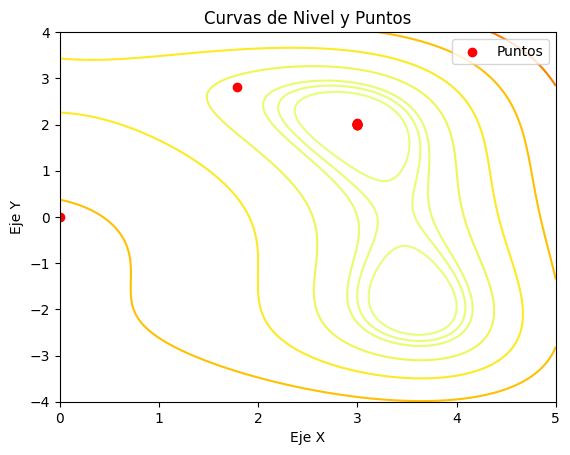

In [ ]:
#nuevamente alcanzamos el limite de iteraciones
#bajaremos nuevamente la tolerancia para observar que ocurre
sol2=Max_Dec(himmelblau, Grad_himmelblau, x_02, tol1*10, tol2, mIter1, mIter2)
points=sol2[3]
contornosFnc2D_modified(himmelblau, 0, 5, -4, 4, [10, 15, 20, 40, 80, 160, 320], points)

In [ ]:
print("El minimizador alcanzado es:\n", sol2[0])
print("¿Terminó por criterio de paro?", sol2[-2])
print("Iteraciones alcanzadas:", sol2[1])

El minimizador alcanzado es:
 [3.00001918 2.00008351]
¿Terminó por criterio de paro? True
Iteraciones alcanzadas: 10


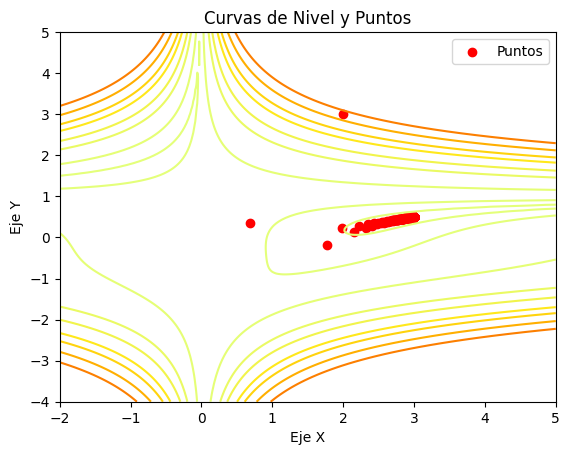

In [ ]:
#probamos con la función de beale

x_11=np.array([2,3])
n=x_11.shape[0]

sol3=Max_Dec(beale, Grad_beale, x_11, tol1, tol2, mIter1, mIter2)
points=sol3[3]
contornosFnc2D_modified(beale, -2, 5, -4, 5, [0.5, 5, 50, 250, 500, 1000, 1500, 2500, 4000], points)

In [ ]:
print("El minimizador alcanzado es:\n", sol3[0])
print("¿Terminó por criterio de paro?", sol3[-2])
print("Iteraciones alcanzadas:", sol3[1])

El minimizador alcanzado es:
 [3.00000123 0.49999507]
¿Terminó por criterio de paro? False
Iteraciones alcanzadas: 10000


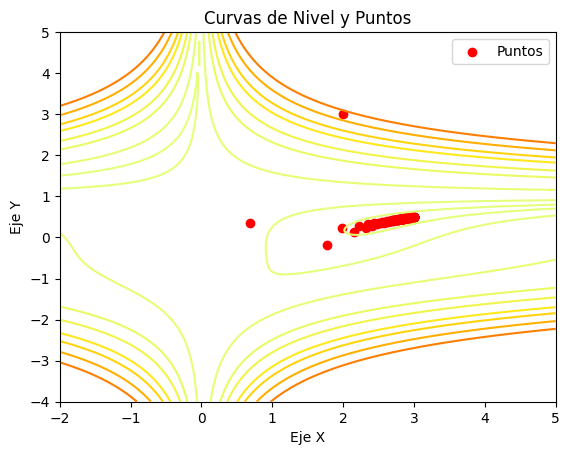

In [ ]:
#nuevamente, probamos reduciendo la tolerancia
sol3=Max_Dec(beale, Grad_beale, x_11, tol1*10, tol2, mIter1, mIter2)
points=sol3[3]
contornosFnc2D_modified(beale, -2, 5, -4, 5, [0.5, 5, 50, 250, 500, 1000, 1500, 2500, 4000], points)

In [ ]:
print("El minimizador alcanzado es:\n", sol3[0])
print("¿Terminó por criterio de paro?", sol3[-2])
print("Iteraciones alcanzadas:", sol3[1])

El minimizador alcanzado es:
 [2.99797109 0.49953639]
¿Terminó por criterio de paro? True
Iteraciones alcanzadas: 193


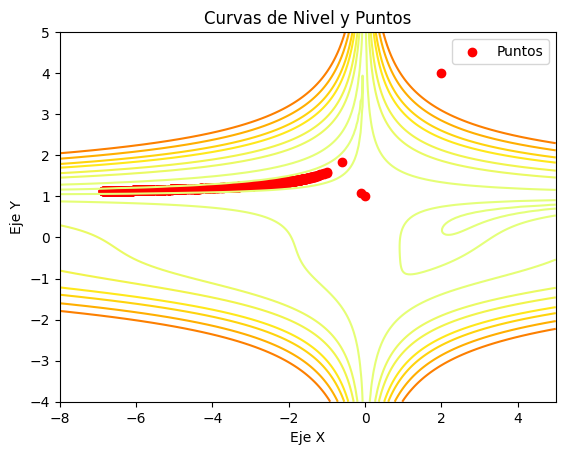

In [ ]:
#probamos con el otro punto
x_12=np.array([2,4])
n=x_12.shape[0]

sol4=Max_Dec(beale, Grad_beale, x_12, tol1, tol2, mIter1, mIter2)
points=sol4[3]
contornosFnc2D_modified(beale, -8, 5, -4, 5, [0.5, 5, 50, 250, 500, 1000, 1500, 2500, 4000], points)

In [ ]:
print("El minimizador alcanzado es:\n", sol4[0])
print("¿Terminó por criterio de paro?", sol4[-2])
print("Iteraciones alcanzadas:", sol4[1])

El minimizador alcanzado es:
 [-6.86281204  1.12864735]
¿Terminó por criterio de paro? False
Iteraciones alcanzadas: 10000


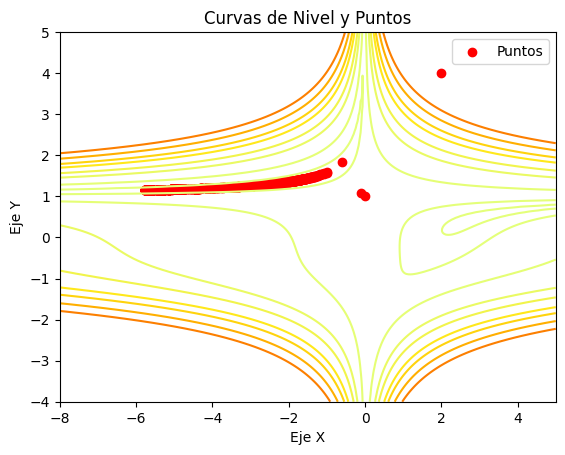

In [ ]:
#reducimos tolerancia como prueba
sol4=Max_Dec(beale, Grad_beale, x_12, tol1*10, tol2, mIter1, mIter2)
points=sol4[3]
contornosFnc2D_modified(beale, -8, 5, -4, 5, [0.5, 5, 50, 250, 500, 1000, 1500, 2500, 4000], points)

In [ ]:
print("El minimizador alcanzado es:\n", sol4[0])
print("¿Terminó por criterio de paro?", sol4[-2])
print("Iteraciones alcanzadas:", sol4[1])

El minimizador alcanzado es:
 [-5.75747835  1.15047916]
¿Terminó por criterio de paro? True
Iteraciones alcanzadas: 2300


Aunque en la última prueba si hubo una reducción de iteraciones bastante considerable, hay que notar que por el punto inicial el algoritmo no está llegando al mínimo local deseado.

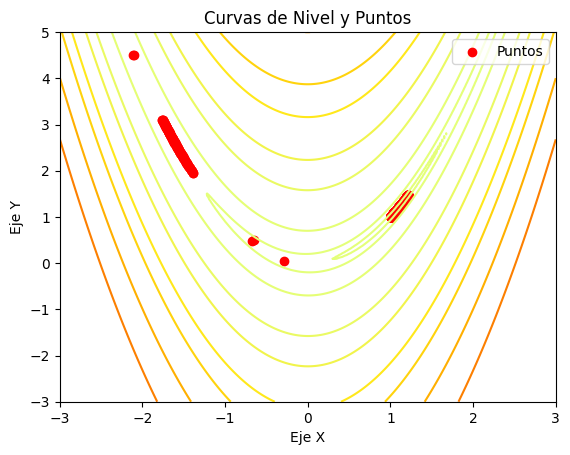

In [ ]:
#probamos la última función
x_21=np.array([-2.1,4.5])
n=x_21.shape[0]

sol5=Max_Dec(rosenbrock, Grad_rosenbrock, x_21, tol1, tol2, mIter1, mIter2)
points=sol5[3]
contornosFnc2D_modified(rosenbrock, -3, 3, -3, 5, [0.5, 5, 50, 250, 500, 1000, 1500, 2500, 4000], points)

In [ ]:
print("El minimizador alcanzado es:\n", sol5[0])
print("¿Terminó por criterio de paro?", sol5[-2])
print("Iteraciones alcanzadas:", sol5[1])

El minimizador alcanzado es:
 [1.00341909 1.00687431]
¿Terminó por criterio de paro? True
Iteraciones alcanzadas: 1033


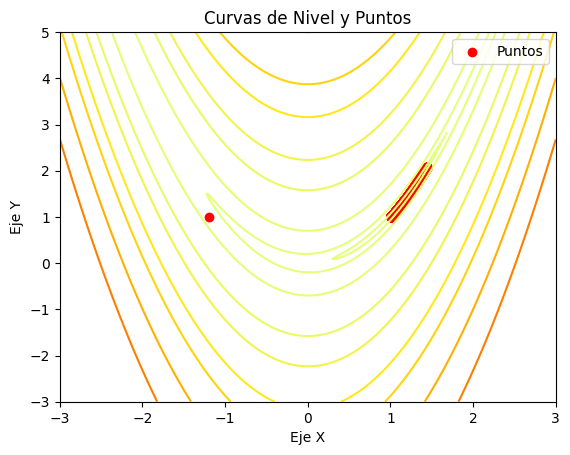

In [ ]:
#probamos con el siguiente punto
x_22=np.array([-1.2,1])
n=x_22.shape[0]

sol6=Max_Dec(rosenbrock, Grad_rosenbrock, x_22, tol1, tol2, mIter1, mIter2)
points=sol6[3]
contornosFnc2D_modified(rosenbrock, -3, 3, -3, 5, [0.5, 5, 50, 250, 500, 1000, 1500, 2500, 4000], points)

In [ ]:
print("El minimizador alcanzado es:\n", sol6[0])
print("¿Terminó por criterio de paro?", sol6[-2])
print("Iteraciones alcanzadas:", sol6[1])

El minimizador alcanzado es:
 [1.00339717 1.00683022]
¿Terminó por criterio de paro? True
Iteraciones alcanzadas: 1730


In [ ]:
#probamos el siguiente punto
x_23=np.array([-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5])
n=x_23.shape[0]
tol11=np.sqrt(x_23.shape[0])*eps_machine**(1/3)

sol7=Max_Dec(rosenbrock, Grad_rosenbrock, x_23, tol11, tol2, mIter1, mIter2)
print("El minimizador alcanzado es:\n", sol7[0])
print("¿Terminó por criterio de paro?", sol7[-2])
print("Iteraciones alcanzadas:", sol7[1])

El minimizador alcanzado es:
 [0.99995952 0.99992256 0.9998378  0.99968437 0.99935619 0.99872108
 0.99742673 0.99485616 0.98970678 0.97947092]
¿Terminó por criterio de paro? True
Iteraciones alcanzadas: 4730


In [ ]:
#probamos el siguiente punto
x_24=np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0])
n=x_24.shape[0]
tol12=np.sqrt(x_24.shape[0])*eps_machine**(1/3)

sol8=Max_Dec(rosenbrock, Grad_rosenbrock, x_24, tol12, tol2, mIter1, mIter2)
print("El minimizador alcanzado es:\n", sol8[0])
print("¿Terminó por criterio de paro?", sol8[-2])
print("Iteraciones alcanzadas:", sol8[1])

El minimizador alcanzado es:
 [0.99995854 0.999913   0.99983305 0.99965513 0.9993205  0.99862585
 0.99725817 0.99450073 0.9890109  0.97808382]
¿Terminó por criterio de paro? True
Iteraciones alcanzadas: 4281


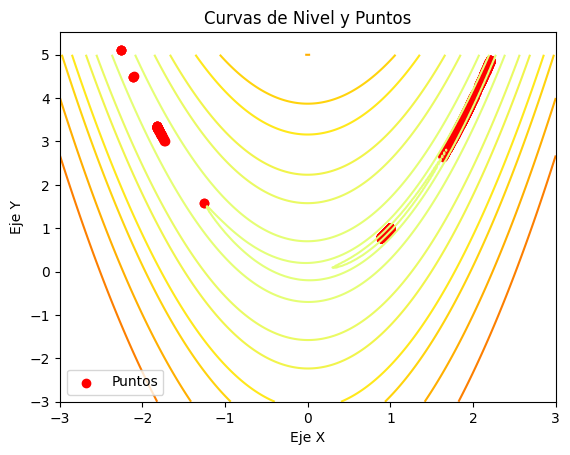

In [ ]:
#probamos con las nuevas tolerancias
x_25=np.array([-2.1,4.5])
n=x_25.shape[0]

sol9=Max_Dec(rosenbrock, Grad_rosenbrock, x_25, tol1, eps_machine**(1/4), mIter1, 50)
points=sol9[3]
contornosFnc2D_modified(rosenbrock, -3, 3, -3, 5, [0.5, 5, 50, 250, 500, 1000, 1500, 2500, 4000], points)

In [ ]:
print("El minimizador alcanzado es:\n", sol9[0])
print("¿Terminó por criterio de paro?", sol9[-2])
print("Iteraciones alcanzadas:", sol9[1])

El minimizador alcanzado es:
 [0.99991433 0.99942901]
¿Terminó por criterio de paro? False
Iteraciones alcanzadas: 10000


En este caso, no es una gran idea, pues alterar el tamaño de paso de esa forma requirió de más iteraciones para el cálculo del minimizador, al punto de que no se pudo alcanzar la tolerancia con el máximo de iteraciones.

Por esto, es importante notar que alterar el cálculo del tamaño de paso puede tener repercusiones importantes en el cálculo principal del minimizador.

_

```







```

---

## Ejercicio 4 (1.5 puntos)

Sea $f(x) = (x-1)^2$ con $x \in \mathbb{R}$ y generamos la secuencia

$$ x_{k+1} = x_k - \frac{\alpha}{2^k} f'(x_k) $$

con $0 < \alpha < 1$, para obtener el minimizador de la función $f(x)$.
Muestre que la secuencia $\{x_k\}$ converge a $1$. ¿Tiene este algoritmo
la propiedad de descenso, es decir, $f(x_{k+1}) < f(x_k)$ a partir de un
cierto $k$?. ¿Es el algoritmo globalmente convergente?

### Solución:

Tenemos que $f'(x)=2(x-1)$. Luego, la función $f$ tiene un mínimo en $x_*=1$, de hecho, es mínimo global y único punto crítico de la función. Mostraremos que la sucesión tiene la propiedad de descenso.

Procedemos por casos:
- Si $x_{k+1}>x_k$ para algún $k$, significa entonces que el término $$- \frac{\alpha}{2^k} f'(x_k) >0$$ de aquí que $f'(x_k)<0 $ lo que implica que la función es decreciente, por lo que $f(x_{k+1}) < f(x_k)$. Esto es, si se avanza por la izquierda, es una dirección de descenso.
- Si $x_{k+1}<x_k$ para algún $k$, entonces el término $$- \frac{\alpha}{2^k} f'(x_k) <0$$ por lo que $f'(x_k) >0 $, así, la función es creciente, por lo que $f(x_{k+1}) < f(x_k)$. Esto es, si se avanza por la derecha, es una dirección de descenso.

Sin embargo, la convergencia numérica a 1 depende de muchos factores, entre ellos, $α$.

Notemos que, si $\alpha =\dfrac{1}{2}$ entonces para cualquier $x_0$, se tiene que $$x_1=x_0-\dfrac{1}{2}2(x_0-1)=1$$ si bien, aunque aún no se cumpliría una tolerancia usual, tenemos que $$x_2=x_1-\dfrac{1}{2}(x_1-1)=x_1=1$$ por lo que en dos iteraciones habríamos llegado al mínimo para cualquier valor de $x_0$.

Ahora, si $\alpha \neq\dfrac{1}{2}$ tenemos que $$x_1=x_0-2\alpha (x_0-1)$$ lo que impediría que en dos iteraciones lleguemos al minimizador, pero más aún, si $|x_0|$ es lo suficientemente grande, requeriremos de más iteraciones, encontrándonos con un problema. Notemos que el tamaño de paso en la $k-$ésima iteración es la mitad de la iteración $k-1$, por lo que, para algún $k$, el tamaño de paso llegaría a cero (numéricamente) muy rápido, provocando que en esas iteraciones, $x_{k+1}=x_k$ cumpliendo inmediatamente con la tolerancia y deteniéndose, pero al ser $x_0$ muy grande, aún estaríamos lejos del minimizador real.

Por lo que, la convergencia a 1, si bien la sucesión analíticamente converge, depende de $\alpha$ y de la magnitud que se de a $x_0$ para alcanzar rápido la tolerancia numérica.

Los siguientes ejemplos muestran este fenómeno. Si fijamos $\alpha =0.5$ no importa el valor de $x_0$, llegamos en dos iteraciones. Sin embargo, si movemos al valor de $\alpha$, para valores de $x_0$ alejados de 1, observamos que la tolerancia se cumple en no muchas iteraciones, pero el minimizador aún está lejos del minimizador real. Se requiere de un $x_0$ cercano a 1 para lograr un acercamiento más aceptable.

In [23]:
def seq(x0, tol, alpha):
  for i in range(10000):
    x1=x0-alpha/(2**i) *2*(x0-1)
    if(np.abs(x1-x0)<tol):
      return x1, True, i+1
    x0=x1
  return x1, False, 10000

In [24]:
s1, b1, it1=seq(100000, 1e-6, 0.5)
print("El valor alcanzado es {}".format(s1))
print("¿Alcancé el límite de iteraciones?", b1)
print("Iteraciones:",it1)

El valor alcanzado es 1.0
¿Alcancé el límite de iteraciones? True
Iteraciones: 2


In [25]:
s2, b2, it2=seq(-100000, 1e-6, 0.5)
print("El valor alcanzado es {}".format(s2))
print("¿Alcancé el límite de iteraciones?", b2)
print("Iteraciones:",it2)

El valor alcanzado es 1.0
¿Alcancé el límite de iteraciones? True
Iteraciones: 2


In [26]:
s3, b3, it3=seq(-146370, 1e-6, 0.5)
print("El valor alcanzado es {}".format(s3))
print("¿Alcancé el límite de iteraciones?", b3)
print("Iteraciones:",it3)

El valor alcanzado es 1.0
¿Alcancé el límite de iteraciones? True
Iteraciones: 2


In [31]:
s4, b4, it4=seq(100000, 1e-6, 0.6)
print("El valor alcanzado es {}".format(s4))
print("¿Alcancé el límite de iteraciones?", b4)
print("Iteraciones:",it4)

El valor alcanzado es -4079.9018042158646
¿Alcancé el límite de iteraciones? True
Iteraciones: 34


In [28]:
s5, b5, it5=seq(100000, 1e-6, 0.4)
print("El valor alcanzado es {}".format(s5))
print("¿Alcancé el límite de iteraciones?", b5)
print("Iteraciones:",it5)

El valor alcanzado es 7805.313262265598
¿Alcancé el límite de iteraciones? True
Iteraciones: 34


In [29]:
s6, b6, it6=seq(1.5, 1e-6, 0.4)
print("El valor alcanzado es {}".format(s6))
print("¿Alcancé el límite de iteraciones?", b6)
print("Iteraciones:",it6)

El valor alcanzado es 1.039022909227251
¿Alcancé el límite de iteraciones? True
Iteraciones: 16
